In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [19]:
x = torch.randn(1, 8, 64)
query = nn.Linear(64, 64)(x)
key = nn.Linear(64, 64)(x)
value = nn.Linear(64, 64)(x)

In [20]:
d_k = query.size()[-1]
scaled = torch.matmul(query, key.transpose(-1, -2)) / (d_k ** 0.5)
print(scaled.shape)
attention = F.softmax(scaled, dim=-1)
out = torch.matmul(attention, value)

torch.Size([1, 8, 8])


In [21]:
d_k2 = query.shape[-1]
wei = query @ key.transpose(-2, -1)  * d_k2**(-0.5) 
print(wei.shape)
wei = F.softmax(wei, dim = -1) 
out2 = wei @ value

torch.Size([1, 8, 8])


In [22]:
# check if the two methods are the same
print(torch.allclose(out, out2))

True


In [26]:
d_model = 512
parameters_shape=([d_model])
dims = [-(i+1) for i in range(len(parameters_shape))] # [-1]
dims


[-1]

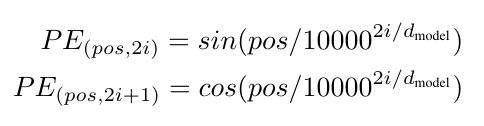

In [14]:
d_model = 10
max_sequence_length = 5

i = torch.arange(d_model)
even_i = i[::2]
odd_i = i[1::2]
print(even_i)
print(odd_i)
even_denom = 10000 ** (2 * torch.tensor(even_i) // d_model)
odd_denom = 10000 ** (2 * torch.tensor(odd_i) // d_model)
print(even_denom)
print(odd_denom)
print(torch.allclose(even_denom, odd_denom))

tensor([0, 2, 4, 6, 8])
tensor([1, 3, 5, 7, 9])
tensor([    1,     1,     1, 10000, 10000])
tensor([    1,     1, 10000, 10000, 10000])
False


C:\Users\Sasini Wanigathunga\AppData\Local\Temp\ipykernel_31280\2272284102.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  even_denom = 10000 ** (2 * torch.tensor(even_i) // d_model)
C:\Users\Sasini Wanigathunga\AppData\Local\Temp\ipykernel_31280\2272284102.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  odd_denom = 10000 ** (2 * torch.tensor(odd_i) // d_model)


In [9]:
d_model = 512
max_sequence_length = 200

even_i = torch.arange(0, d_model, 2).float() # [0, 2, 4, 6, 8, 10, ..., 510]
print(even_i.shape)
print(even_i)
denominator = torch.pow(10000, 2 * even_i / d_model) # [10000^(0/512), 10000^(2/512), 10000^(4/512), ..., 10000^(510/512)]
print(denominator.shape)
print(denominator)
position = (torch.arange(max_sequence_length).reshape(max_sequence_length, 1)) # [[0], [1], [2], ..., [199]]
print(position.shape)
print(position)
even_PE = torch.sin(position / denominator) # sin(0/10000^(0/512)), sin(1/10000^(2/512)), sin(2/10000^(4/512)), ..., sin(199/10000^(510/512))
print(even_PE.shape)
print(even_PE)
odd_PE = torch.cos(position / denominator) # cos(0/10000^(0/512)), cos(1/10000^(2/512)), cos(2/10000^(4/512)), ..., cos(199/10000^(510/512))
print(odd_PE.shape)
print(odd_PE)
stacked = torch.stack([even_PE, odd_PE], dim=2) # [[sin(0/10000^(0/512)), cos(0/10000^(0/512))], [sin(1/10000^(2/512)), cos(1/10000^(2/512))], ..., [sin(199/10000^(510/512)), cos(199/10000^(510/512))]]
print(stacked.shape)
print(stacked)
PE = torch.flatten(stacked, start_dim=1, end_dim=2)  # [sin(0/10000^(0/512)), cos(0/10000^(0/512)), sin(1/10000^(2/512)), cos(1/10000^(2/512)), ..., sin(199/10000^(510/512)), cos(199/10000^(510/512))]
print(PE.shape)
print(PE)

torch.Size([6])
tensor([ 0.,  2.,  4.,  6.,  8., 10.])
torch.Size([6])
tensor([1.0000e+00, 2.1544e+01, 4.6416e+02, 1.0000e+04, 2.1544e+05, 4.6416e+06])
torch.Size([5, 1])
tensor([[0],
        [1],
        [2],
        [3],
        [4]])
torch.Size([5, 6])
tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00],
        [ 8.4147e-01,  4.6399e-02,  2.1544e-03,  1.0000e-04,  4.6416e-06,
          2.1544e-07],
        [ 9.0930e-01,  9.2698e-02,  4.3089e-03,  2.0000e-04,  9.2832e-06,
          4.3089e-07],
        [ 1.4112e-01,  1.3880e-01,  6.4633e-03,  3.0000e-04,  1.3925e-05,
          6.4633e-07],
        [-7.5680e-01,  1.8460e-01,  8.6176e-03,  4.0000e-04,  1.8566e-05,
          8.6177e-07]])
torch.Size([5, 6])
tensor([[ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9989,  1.0000,  1.0000,  1.0000,  1.0000],
        [-0.4161,  0.9957,  1.0000,  1.0000,  1.0000,  1.0000],
        [-0.9900,  0.9903,  1.0000,  1.0000,  1

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# random seed of 42
torch.manual_seed(42)

# random tensor shaped (1, 2, 4, 4)
wei = torch.randn(1, 2, 2, 2)

# triangular mask
mask = torch.tril(torch.ones(2, 2))
tril = torch.tril(torch.ones((2, 2)))

wei1 = wei + mask
wei1 = F.softmax(wei1, dim = -1)

wei3 = (wei.permute(1,0,2,3) + mask).permute(1,0,2,3)
wei3 = F.softmax(wei3, dim = -1)

wei2 = wei.masked_fill(tril[:2, :2] == 0, float('-inf'))
wei2 = F.softmax(wei2, dim = -1)

In [37]:
# check similarity between wei+mask and (wei.permute(1,0,2,3)+mask).permute(1,0,2,3)
print(torch.allclose(wei1, wei3))

True


In [38]:
print(torch.allclose(wei1, wei2))

False


In [39]:
print(wei)
print(wei1)
print(wei2)
print(wei3)

tensor([[[[ 0.3367,  0.1288],
          [ 0.2345,  0.2303]],

         [[-1.1229, -0.1863],
          [ 2.2082, -0.6380]]]])
tensor([[[[0.7699, 0.2301],
          [0.5010, 0.4990]],

         [[0.5159, 0.4841],
          [0.9451, 0.0549]]]])
tensor([[[[1.0000, 0.0000],
          [0.5010, 0.4990]],

         [[1.0000, 0.0000],
          [0.9451, 0.0549]]]])
tensor([[[[0.7699, 0.2301],
          [0.5010, 0.4990]],

         [[0.5159, 0.4841],
          [0.9451, 0.0549]]]])
